# Parte 1

In [1]:
# CARREGANDO OS DADOS

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(rescale = (1./128) - 1, validation_split = 0.3)

train1 = datagen1.flow_from_directory('databirds/', batch_size=32, class_mode = 'categorical', target_size=(224, 224), subset='training')
test1 = datagen1.flow_from_directory('databirds/', batch_size=32, class_mode = 'categorical', target_size=(224, 224), subset='validation')

Found 29262 images belonging to 6 classes.
Found 12539 images belonging to 6 classes.


## My model


In [8]:
import splitfolders
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
input_shape = (224, 224, 3)
n_classes = 10
img_dims = 224

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(2, 2), padding='valid',input_shape=(224,224,3)))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))


model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))


model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(n_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        5

In [4]:
import os 
checkpoint_path = "model/cp.ckpt.index"
checkpoint_dir = os.path.dirname(checkpoint_path)
#model.load_weights(checkpoint_path)
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [5]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'model\\cp.ckpt'

In [6]:
model.load_weights(latest)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001A2A5928C08> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001A2A594F188>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001A2A592F608> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001A2A5928C08>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001A2A592F588> and <tensorflow.python.keras.layers.core.Activation object at 0x000001A2A5ABE5C8>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001A2ACC73688> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001A2A592F588>).

Two checkpoint references resolved to different obje

In [7]:
for layer in model.layers:
    layer.trainable = False

modelTL = keras.models.Sequential()
for layer in model.layers[0:-1]:
    modelTL.add(layer)

modelTL.add(layers.Dense(6, activation='softmax'))
sgd = SGD(learning_rate=0.1)

modelTL.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
modelTL.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)       

In [8]:
modelTL_hist = modelTL.fit(train1, validation_data=test1, epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 915 steps, validate for 392 steps
Epoch 1/10
915/915 [==============================] - 201s 220ms/step - loss: 1.2358 - accuracy: 0.5358 - val_loss: 1.3909 - val_accuracy: 0.4437
Epoch 2/10
915/915 [==============================] - 71s 78ms/step - loss: 1.1952 - accuracy: 0.5456 - val_loss: 1.3918 - val_accuracy: 0.4515
Epoch 3/10
915/915 [==============================] - 71s 78ms/step - loss: 1.1908 - accuracy: 0.5473 - val_loss: 1.4216 - val_accuracy: 0.4355
Epoch 4/10
915/915 [==============================] - 71s 78ms/step - loss: 1.1903 - accuracy: 0.5474 - val_loss: 1.3904 - val_accuracy: 0.4370
Epoch 5/10
915/915 [==============================] - 77s 84ms/step - loss: 1.1879 - accuracy: 0.5480 - val_loss: 1.4065 - val_accuracy: 0.4449
Epoch 6/10
915/915 [==============================] - 75s 82ms/step - loss: 1.1872 - accuracy: 0.5477 - val_loss: 1.4029 - val_accuracy: 0.4386
Epoch 7/10
915/915 [====================

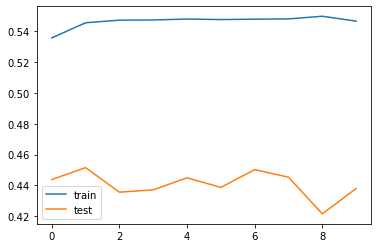

In [9]:
import matplotlib.pyplot as plt
plt.plot(modelTL_hist.history['accuracy'], label='train')
plt.plot(modelTL_hist.history['val_accuracy'], label='test')
plt.legend()

In [10]:
from sklearn.metrics import f1_score
predictions = modelTL.predict(test1)
predictions = tf.argmax(predictions, axis=-1)

y_pred = predictions.numpy()
y_true = test1.labels
f1 = f1_score(y_true, y_pred, average='macro') 
f1

0.154007740530345

<AxesSubplot:>

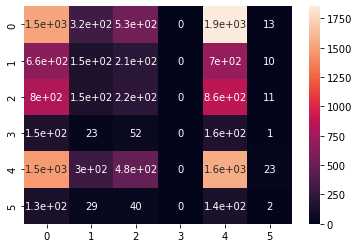

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(matrix, annot=True)

# Parte 2

In [9]:
# Carregando os dados

datagen2 = ImageDataGenerator(rescale = (1./255), validation_split = 0.3)

train2 = datagen2.flow_from_directory('databirds/', batch_size=32, class_mode = 'categorical', target_size=(224, 224), subset='training')
test2 = datagen2.flow_from_directory('databirds/', batch_size=32, class_mode = 'categorical', target_size=(224, 224), subset='validation')

Found 29262 images belonging to 6 classes.
Found 12539 images belonging to 6 classes.


In [10]:
IMG_SHAPE = (224, 224, 3)


MNV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

for layer in MNV2.layers[:-5]:
    layer.trainable = False

In [11]:
from tensorflow.keras.models import Model

output_base_model = layers.Dense(6, activation='softmax')(MNV2.layers[-2].output)
MNV2 = Model(inputs=MNV2.layers[0].output, outputs=output_base_model)

In [12]:
sgd = SGD(learning_rate=0.01)
MNV2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
MNV2_hist = MNV2.fit(train2, validation_data=test2, epochs=10)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 915 steps, validate for 392 steps
Epoch 1/10
915/915 [==============================] - 108s 118ms/step - loss: 0.5689 - accuracy: 0.7972 - val_loss: 0.9931 - val_accuracy: 0.6327
Epoch 2/10
915/915 [==============================] - 106s 116ms/step - loss: 0.3909 - accuracy: 0.8612 - val_loss: 0.9329 - val_accuracy: 0.6520
Epoch 3/10
915/915 [==============================] - 114s 125ms/step - loss: 0.3237 - accuracy: 0.8877 - val_loss: 0.8833 - val_accuracy: 0.6728
Epoch 4/10
915/915 [==============================] - 118s 130ms/step - loss: 0.2720 - accuracy: 0.9089 - val_loss: 0.8743 - val_accuracy: 0.6727
Epoch 5/10
915/915 [==============================] - 115s 126ms/step - loss: 0.2276 - accuracy: 0.9269 - val_loss: 0.9210 - val_accuracy: 0.6612
Epoch 6/10
915/915 [==============================] - 105s 115ms/step - loss: 0.1887 - accuracy: 0.9442 - val_loss: 0.9578 - val_accuracy: 0.6464
Epoch 7/10
915/915 [==============================] - 103s 113ms/step - loss: 0.

In [14]:
predictions2 = MNV2.predict(test2)
predictions2 = tf.argmax(predictions2, axis=-1)

from sklearn.metrics import f1_score
y_pred2 = predictions2.numpy()
y_true2 = test2.labels
f1_2 = f1_score(y_true2, y_pred2, average=None) 
f1_2

array([0.33778914, 0.10143934, 0.15690169, 0.05861665, 0.28346674,
       0.02079723])

<AxesSubplot:>

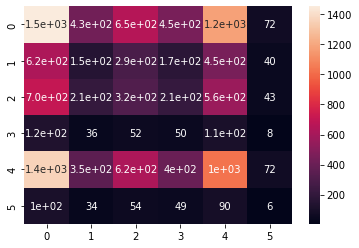

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
matrix2 = confusion_matrix(y_true2, y_pred2)

plt.figure()
sns.heatmap(matrix2, annot=True)